# 3D Map

While representing the configuration space in 3 dimensions isn't entirely practical it's fun (and useful) to visualize things in 3D.

In this exercise you'll finish the implementation of `create_grid` such that a 3D grid is returned where cells containing a voxel are set to `True`. We'll then plot the result!

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [24]:
plt.rcParams['figure.figsize'] = 8, 8

In [5]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-305.  -435.    85.5    5.     5.    85.5]
 [-295.  -435.    85.5    5.     5.    85.5]
 [-285.  -435.    85.5    5.     5.    85.5]
 ...
 [ 435.   465.     8.     5.     5.     8. ]
 [ 445.   465.     8.     5.     5.     8. ]
 [ 455.   465.     8.     5.     5.     8. ]]


In [46]:
def create_voxmap(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    
    for i in range(data.shape[0]):
        # TODO: fill in the voxels that are part of an obstacle with `True`
        #
        # i.e. grid[0:5, 20:26, 2:7] = True
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        obstacle = [
            int(north - d_north - north_min_center) // voxel_size,
            int(north + d_north - north_min_center) // voxel_size,
            int(east - d_east - east_min_center) // voxel_size,
            int(east + d_east - east_min_center) // voxel_size,
        ]
        height = int(alt + d_alt) // voxel_size
        voxmap[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3], 0:height] = True

    return voxmap

In [47]:
def create_voxmap2(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    
    for i in range(data.shape[0]):
        # TODO: fill in the voxels that are part of an obstacle with `True`
        #
        # i.e. grid[0:5, 20:26, 2:7] = True
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        obstacle = [
            int(north - d_north - north_min) // voxel_size,
            int(north + d_north - north_min) // voxel_size,
            int(east - d_east - east_min) // voxel_size,
            int(east + d_east - east_min) // voxel_size,
        ]
        height = int(alt + d_alt) // voxel_size
        voxmap[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3], 0:height] = True

    return voxmap

Create 3D grid.

In [7]:
voxmap = create_voxmap(data, 10)
print(voxmap.shape)

(81, 91, 21)


Plot the 3D grid. 

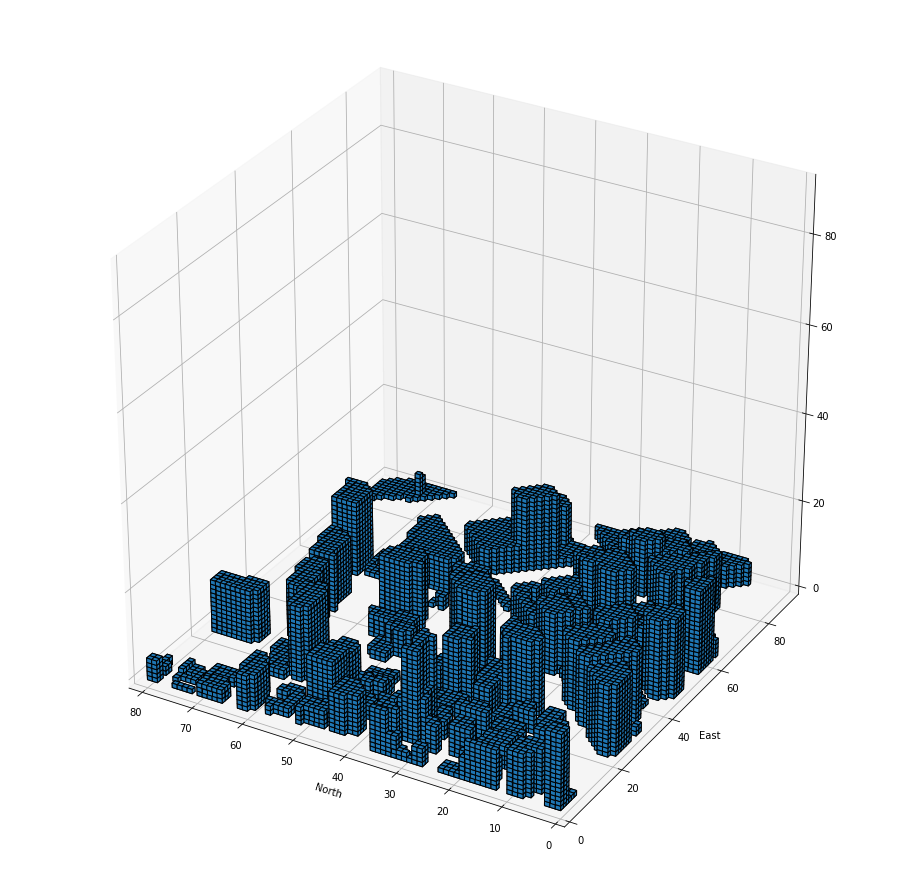

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add 100 to the height so the buildings aren't so tall
ax.set_zlim(0, voxmap.shape[2]+70)

plt.xlabel('North')
plt.ylabel('East')

plt.show()

Isn't the city pretty?

[solution](/notebooks/Voxel-Map-Solution.ipynb)

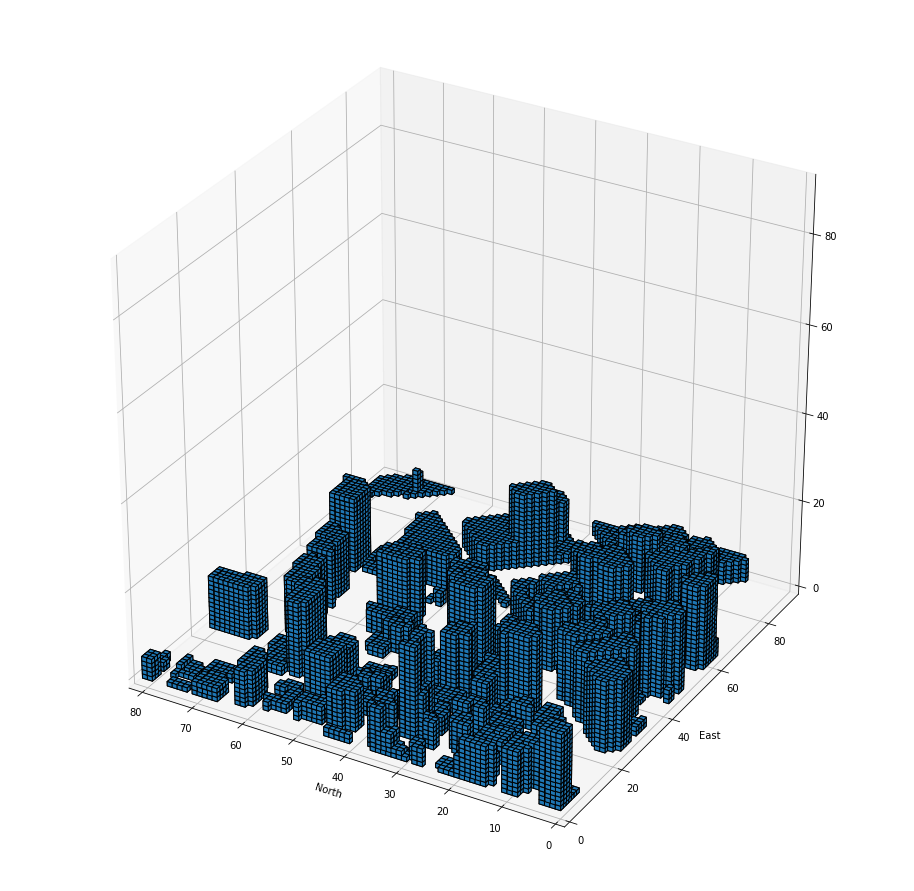

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add 100 to the height so the buildings aren't so tall
ax.set_zlim(0, voxmap.shape[2]+70)

plt.xlabel('North')
plt.ylabel('East')

plt.show()

In [48]:
voxmap = create_voxmap(data, 1)
voxmap2 = create_voxmap2(data, 1)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(voxmap[:,:,0].astype(int), cmap='Greys', origin='lower')
ax[0].set_title('min center shift')
ax[0].set_ylabel('North')
ax[0].set_xlabel('East')

ax[1].imshow(voxmap2[:,:,0].astype(int), cmap='Greys', origin='lower')
ax[1].set_title('center shift')
ax[1].set_ylabel('North')
ax[1].set_xlabel('East')

plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(voxmap[:,:,0].astype(int), cmap='Greys', origin='lower')
ax[0].set_title('min center shift')
ax[0].set_ylabel('North')
ax[0].set_xlabel('East')
ax[0].set_xlim(0,100)
ax[0].set_ylim(0,100)

ax[1].imshow(voxmap2[:,:,0].astype(int), cmap='Greys', origin='lower')
ax[1].set_title('center shift')
ax[1].set_ylabel('North')
ax[1].set_xlabel('East')
ax[1].set_xlim(0,100)
ax[1].set_ylim(0,100)

plt.show()